<a href="https://colab.research.google.com/github/bestcx7/2023notebook/blob/main/Gorilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

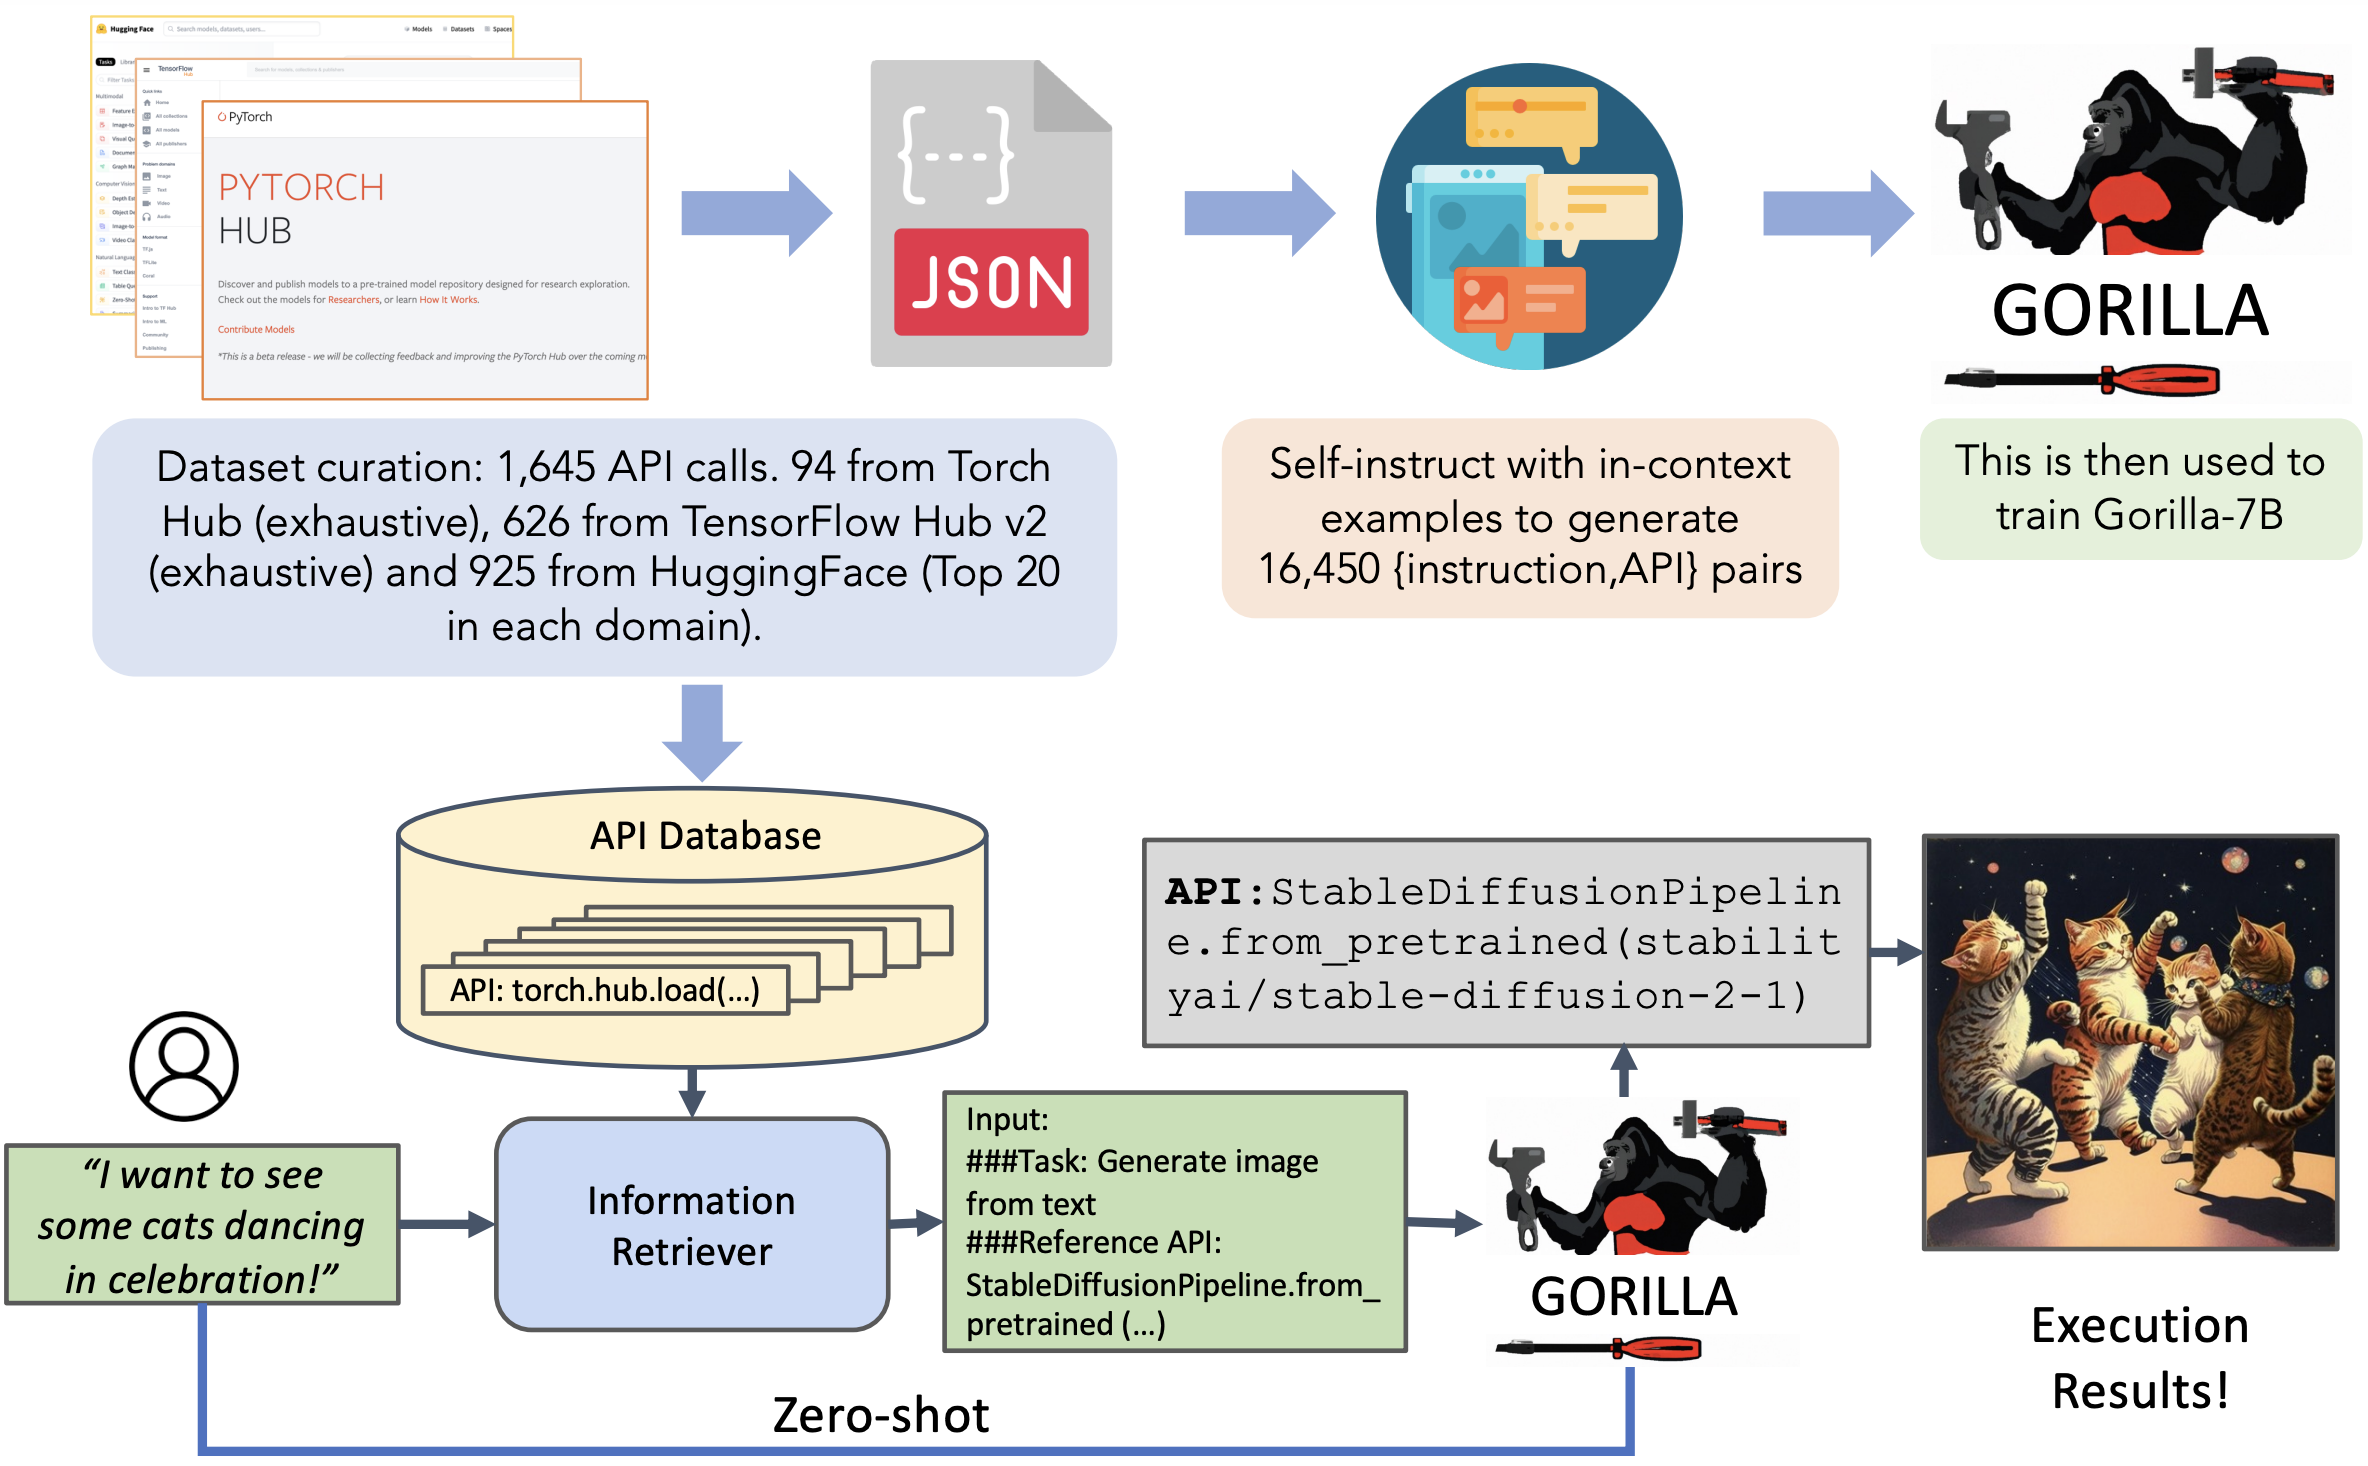

[Gorilla: LLM connected with apis ](https://readpaper.com/pdf-annotate/note?pdfId=4762415044914839553&noteId=1960369613768155136)
- 论文部分
  - 1.数据收集
    - 从Huggingface, Torch hub, Tensorflow hub收集数据1645个api。
    - api数据集格式{domain, framework, functionality, api_name, api_call, api_arguments, environment_requirements, example_code, performance, and description.},
    <details>
    <summary>api举例</summary>
     {"domain": "Natural Language Processing Feature Extraction", "framework": "PyTorch Transformers", "functionality": "Feature Extraction", "api_name": "kobart-base-v2", "api_call": "BartModel.from_pretrained('gogamza/kobart-base-v2')", "api_arguments": {"tokenizer": "PreTrainedTokenizerFast.from_pretrained('gogamza/kobart-base-v2')"}, "python_environment_requirements": {"transformers": "latest", "tokenizers": "latest"}, "example_code": "from transformers import PreTrainedTokenizerFast, BartModel\ntokenizer = PreTrainedTokenizerFast.from_pretrained('gogamza/kobart-base-v2')\nmodel = BartModel.from_pretrained('gogamza/kobart-base-v2')", "performance": {"dataset": "NSMC", "accuracy": 0.901}, "description": "KoBART is a Korean encoder-decoder language model trained on over 40GB of Korean text using the BART architecture. It can be used for feature extraction and has been trained on a variety of data sources, including Korean Wiki, news, books, and more."}
    </details>
    - 每个api生成10个instruction-api对,最后一共16450个数据。
  - 2.Gorilla
    - 使用自监督去生成{instruction, api}对来训练llama模型。
    - api的调用通常带有约束,常见的约束有：参数的大小，精确度的最低下限。  
    举例 prompt: "Invoke an image classification model that uses less than 10M parameters, but maintains an ImageNet accuracy of at least 70%".
    - Retriever-Aware training（结合信息检索能力），添加一个 "使用此API文档作为参考：`<retrieved_API_doc_JSON>`" 的部分。
    - 生成api的过程两种方式：zero-short直接生成api,信息检索生成api
  - 3.验证api
    - AST子树匹配由于每个API调用可以有许多参数，因此我们需要对每个参数进行匹配。

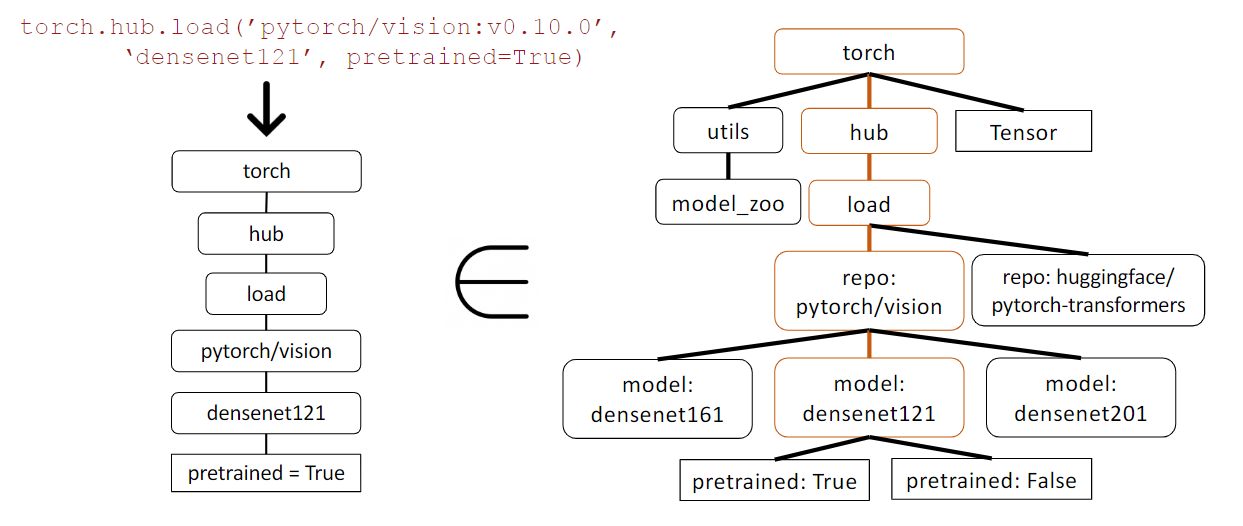

代码实现部分